Import Libraries

In [85]:
import csv
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import pickle

Functions

In [86]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

# THIS IS A FUNCITON YOU CAN CALL FROM OTHER PLACES TO GET THE DATA 
def CSV_Read_Lidar_data(data_path):
    rows = []
    with open(data_path, 'r') as file:
        csvreader = csv.reader(file)
        header = next(csvreader)
        for row in csvreader:
            rows.append(row)
    return header, rows

Read the CSV File

In [87]:
rows = []
file_path = 'Data/'
file_name = 'HallwayNewMovepoint1meter'
with open(file_path+file_name+'.csv', 'r') as file:
    csvreader = csv.reader(file)
    header = next(csvreader)
    for row in csvreader:
        rows.append(row)
print("test")

headers = np.array(header).T


test


Create pd Series and DataFrames

In [88]:
# Create a Series for the header
header_names = ['angle_min', 'angle_max', 'angle_increment', 'time_increment', 'scan_time', 'range_min', 'range_max']
Header_info = pd.DataFrame(headers, header_names).astype(float)
Header_info

,0
angle_min,-3.124139
angle_max,3.141593
angle_increment,0.005807
time_increment,0.000125
scan_time,0.134745
range_min,0.150000
range_max,12.000000


In [89]:
# create a lidar rho dataframe
translation_df = pd.DataFrame(np.array(rows[1::5]))
translation_df = translation_df.T
translation_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.02202627894138972,0.02202627894138972,0.02202627894138972,0.02202627894138972,0.02202627894138972,0.02202627894138972,0.02202627894138972,0.02202627894138972,0.02202627894138972,0.02202627894138972,0.02202627894138972
1,0.015516820205402706,0.015516820205402706,0.015516820205402706,0.015516820205402706,0.015516820205402706,0.015516820205402706,0.015516820205402706,0.015516820205402706,0.015516820205402706,0.015516820205402706,0.015516820205402706
2,-0.0037176295456224,-0.0037176295456224,-0.0037176295456224,-0.0037176295456224,-0.0037176295456224,-0.0037176295456224,-0.0037176295456224,-0.0037176295456224,-0.0037176295456224,-0.0037176295456224,-0.0037176295456224
3,0.002409577267888002,0.002409577267888002,0.002409577267888002,0.002409577267888002,0.002409577267888002,0.002409577267888002,0.002409577267888002,0.002409577267888002,0.002409577267888002,0.002409577267888002,0.002409577267888002
4,0.00026849376766005935,0.00026849376766005935,0.00026849376766005935,0.00026849376766005935,0.00026849376766005935,0.00026849376766005935,0.00026849376766005935,0.00026849376766005935,0.00026849376766005935,0.00026849376766005935,0.00026849376766005935
5,0.532971657646882,0.532971657646882,0.532971657646882,0.532971657646882,0.532971657646882,0.532971657646882,0.532971657646882,0.532971657646882,0.532971657646882,0.532971657646882,0.532971657646882
6,0.8461296200899846,0.8461296200899846,0.8461296200899846,0.8461296200899846,0.8461296200899846,0.8461296200899846,0.8461296200899846,0.8461296200899846,0.8461296200899846,0.8461296200899846,0.8461296200899846


In [90]:
# create a lidar rho dataframe
rho_df = pd.DataFrame(np.array(rows[3::5]))
rho_df = rho_df.T
rho_df

,0,1,2,3,4,5,6,7,8,9,10
0,1.371999979019165,1.371999979019165,1.371999979019165,1.371999979019165,1.371999979019165,1.3680000305175781,1.3700000047683716,1.3680000305175781,1.3680000305175781,1.3700000047683716,1.3680000305175781
1,1.371999979019165,1.371999979019165,1.371999979019165,1.371999979019165,1.371999979019165,1.3700000047683716,1.3700000047683716,1.3680000305175781,1.3680000305175781,1.3680000305175781,1.3680000305175781
2,1.371999979019165,1.371999979019165,1.371999979019165,1.371999979019165,1.3700000047683716,1.3700000047683716,1.3700000047683716,1.3700000047683716,1.3680000305175781,1.3680000305175781,1.3680000305175781
3,1.3739999532699585,1.371999979019165,1.371999979019165,1.371999979019165,1.3700000047683716,1.3700000047683716,1.3700000047683716,1.3680000305175781,1.3680000305175781,1.3680000305175781,1.3680000305175781
4,1.3739999532699585,1.3739999532699585,1.3739999532699585,1.371999979019165,1.371999979019165,1.3700000047683716,1.3700000047683716,1.3700000047683716,1.3680000305175781,1.3680000305175781,1.3660000562667847
...,...,...,...,...,...,...,...,...,...,...,...
1075,1.371999979019165,1.371999979019165,1.371999979019165,1.371999979019165,1.371999979019165,1.3700000047683716,1.3700000047683716,1.3680000305175781,1.3680000305175781,1.3700000047683716,1.3680000305175781
1076,1.371999979019165,1.371999979019165,1.371999979019165,1.371999979019165,1.3700000047683716,1.3700000047683716,1.3700000047683716,1.3700000047683716,1.3680000305175781,1.3680000305175781,1.3680000305175781
1077,1.371999979019165,1.371999979019165,1.371999979019165,1.3739999532699585,1.3700000047683716,1.3700000047683716,1.3700000047683716,1.3700000047683716,1.3680000305175781,1.3680000305175781,1.3680000305175781
1078,1.371999979019165,1.371999979019165,1.371999979019165,1.371999979019165,1.371999979019165,1.3700000047683716,1.3700000047683716,1.3700000047683716,1.3680000305175781,1.3680000305175781,1.3660000562667847


In [91]:
# create a dataframe of the radian alphas
alpha_df = pd.DataFrame()

for i in range(rho_df.shape[1]):
    # Header_info.loc['angle_increment'][i] * np.arange(1, 1081)
    alpha_df[i] = Header_info.loc['angle_increment'][0] * np.arange(1, 1081) - math.pi/2
# alpha_df = alpha_df.transpose().drop(del_indexes, axis=1).transpose()
alpha_df

,0,1,2,3,4,5,6,7,8,9,10
0,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989
1,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182
2,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375
3,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568
4,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761
...,...,...,...,...,...,...,...,...,...,...,...
1075,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514
1076,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321
1077,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128
1078,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935


In [92]:
def flatten_extend(matrix):
    flat_list = []
    for row in matrix:
        flat_list.extend(row)
    return flat_list

del_indexes = np.array(list(rho_df[0][rho_df[0].astype(float) <= 0.5].index))
del_indexes


array([], dtype=float64)

In [93]:
# Create the cartesasion dataset, combine with the polar, then save into a new dataset
all_data_df = []


for i in range(alpha_df.shape[1]):

    cartesian_df = pd.DataFrame(pol2cart(rho_df[i].astype(float), alpha_df[i].astype(float)), ['X', 'Y'])
    alpha_rho_df = pd.DataFrame(cart2pol(rho_df[i].astype(float), alpha_df[i].astype(float)), ['Rho', 'Alpha'])

    #Finally combine the xy data and alpha rho data
    combined_df = pd.concat([alpha_rho_df, cartesian_df])
    combined_df = combined_df.drop(del_indexes, axis=1)
    combined_df = combined_df.T.reset_index(drop=True)
    all_data_df.append(combined_df)



In [94]:
all_data_df[0]

,Rho,Alpha,X,Y
0,2.081244,-0.851014,0.007967,-1.371977
1,2.076881,-0.849171,0.015934,-1.371907
2,2.072525,-0.847320,0.023900,-1.371792
3,2.069503,-0.844738,0.031912,-1.373629
4,2.065164,-0.842871,0.039888,-1.373421
...,...,...,...,...
1075,4.874579,1.285481,-0.047838,-1.371166
1076,4.880152,1.285816,-0.039875,-1.371420
1077,4.885725,1.286150,-0.031911,-1.371629
1078,4.891299,1.286483,-0.023945,-1.371791


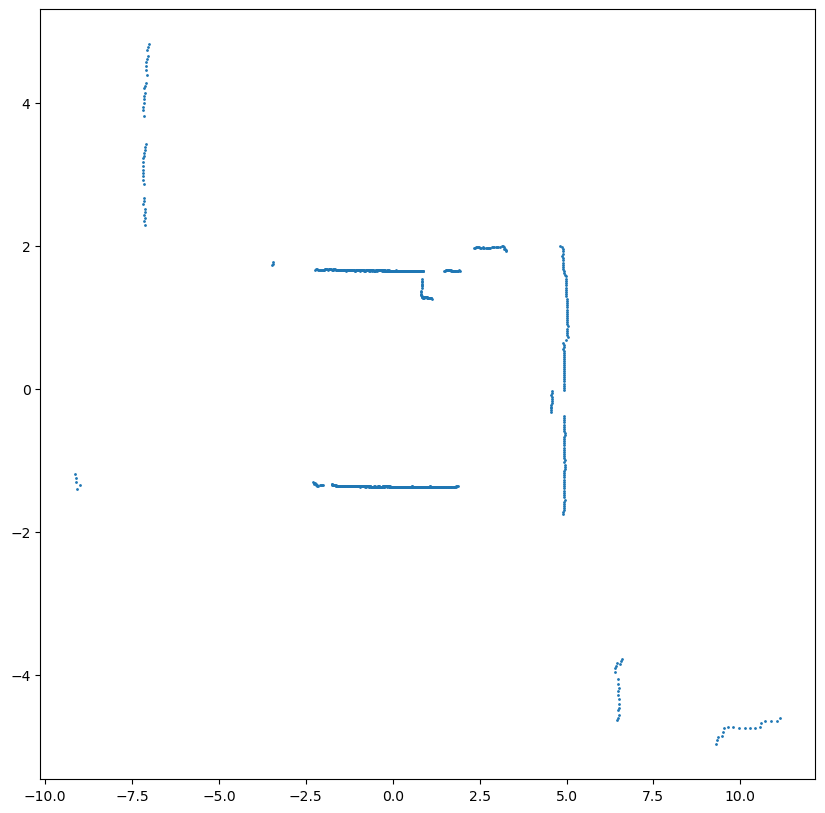

In [95]:
plt_idx = 0

plt.figure(figsize=(10, 10))
plt.scatter(all_data_df[plt_idx]['X'], all_data_df[plt_idx]['Y'], s=1)
plt.show()


In [96]:
# write to csv
addition = '_scan_data_organized'

# Save data
tmp_df = pd.DataFrame()

for i in range(len(all_data_df)):
    tmp_df = pd.concat([tmp_df, all_data_df[i]])
tmp_df = tmp_df
tmp_df.to_csv(file_path + file_name + addition + '.csv')

In [97]:
# # Load datapath and put into dataframe
# # path to csv data
# data_path = 'Data_Readers_Writers/Data/Hallway_Lidar_data_dinosars2_scan_data_organized.csv'
# tmp_df = pd.read_csv(data_path)

# #read and turn to list
# lowrange = 0
# highrange = 1070

# scan_df = []
# for i in range(int(tmp_df.shape[0]/1070)):
#     lowrange = lowrange + 1070 * i
#     highrange = highrange + 1070 * i
#     scan_df.append(tmp_df.iloc[lowrange:highrange, :])

# # Delete any column that has an inf in the rho spot
# for i in range(len(scan_df)):
#     inf_cols = scan_df[i]['Rho'][np.isfinite(scan_df[i]['Rho'])]
#     # print(inf_cols.index)
#     scan_df[i] = scan_df[i].T[inf_cols.index].T.reset_index(drop=True)
# scan_df[2]
